In [1]:
!git clone https://github.com/referreira-wisc/digag2022.git

Cloning into 'digag2022'...
remote: Enumerating objects: 88, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 88 (delta 0), reused 0 (delta 0), pack-reused 69
Unpacking objects: 100% (88/88), done.


In [2]:
import os
os.chdir('digag2022/Lab02')

# <center> Advanced Digital Agriculture (DS/AS 875) <center> Module 01 - Data Analysis (Lab 02)
***
# Table of Contents
* [READING THE DATASET INTO PYTHON](#READING-THE-DATASET-INTO-PYTHON)
* [PART I. LOOK AT YOUR DATA!](#PART-I.-LOOK-AT-YOUR-DATA!)
    * [Editing Dataset](#Editing-Dataset)
    * [Data Visualization](#Data-Visualization)
* [PART II. CORRELATION](#PART-II.-CORRELATION)
* [PART III. REGRESSION](#PART-III.-REGRESSION)
    * [Linear Regression](#Linear-Regression)
    * [ANOVA](#ANOVA)
    * [Leave-one-out cross-validation](#Leave-one-out-cross-validation)
***   

## READING THE DATASET INTO PYTHON

In [3]:
import pandas as pd
cowdata = pd.read_csv("CullDairyCow_Data.csv")
cowdata

,ID,season,lact,calvingEase,lameness,mastitis,reason,lactStage,305ME,price,BW
0,129,1,5,1,0,2,7-Mastitis and Udder,Mid Lactation,14841.5,53.5,1785
1,209,1,4,1,0,1,3-Low production,Late Lactation,14909.6,66.0,1835
2,267,1,5,1,0,2,3-Low production,Late Lactation,12764.1,54.0,1965
3,299,1,7,1,2,0,3-Low production,Mid Lactation,10645.8,43.5,1785
4,341,1,6,2,0,1,3-Low production,Mid Lactation,10704.8,47.0,1640
...,...,...,...,...,...,...,...,...,...,...,...
395,11625,1,1,2,2,0,3-Low production,Late Lactation,10146.9,48.5,1255
396,11697,1,1,1,3,0,3-Low production,Late Lactation,8568.4,52.5,1380
397,11765,1,1,1,3,0,3-Low production,Late Lactation,4948.7,54.5,1475
398,11824,1,1,1,0,0,3-Low production,Mid Lactation,7452.5,42.0,1195


## PART I. LOOK AT YOUR DATA!
* Data inconsistencies, errors
* Data distribution: symmetry, kurtosis, etc.
* Outliers (discrepant observations), redundancies
* Descriptive analysis (summary values and plots)

### Editing Dataset

In [4]:
# Frequency for number of lactations
cowdata["lact"].value_counts(sort=True, ascending=False)

2    134
3     80
1     79
4     55
5     28
6     15
7      7
8      2
Name: lact, dtype: int64

In [5]:
# Lactation number 6 or higher lumped together into a single class (6)
cowdata.loc[cowdata.lact > 6, "lact"] = 6

In [6]:
# Frequency for number of lamness cases
cowdata["lameness"].value_counts(sort=True, ascending=False)

0    255
1     85
2     27
4     19
3     10
5      2
6      2
Name: lameness, dtype: int64

In [7]:
# Number of lamness cases larger than 4 lumped together into a single class (4)
cowdata.loc[cowdata.lameness > 4, "lameness"] = 4

In [8]:
# Frequency for number of lamness cases
cowdata["mastitis"].value_counts(sort=True, ascending=False)

0    130
1    111
2     64
4     37
3     36
5     10
9      5
7      4
6      2
8      1
Name: mastitis, dtype: int64

In [9]:
# Number of mastitis cases larger than 4 lumped together into a single class (4)
cowdata.loc[cowdata.mastitis > 4, "mastitis"] = 4

### Data Visualization
#### Making histograms for numerical variables

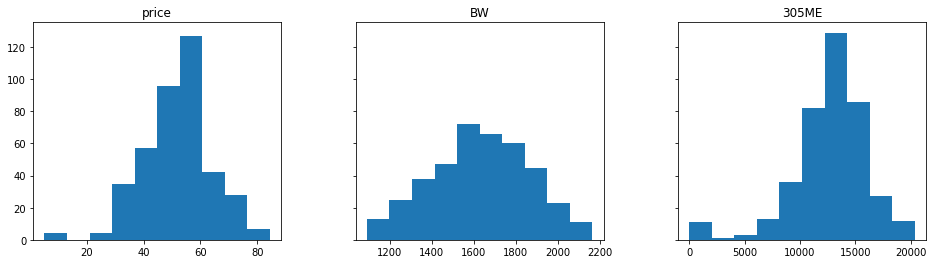

In [10]:
hist = cowdata.hist(column=["price", "BW", "305ME"], figsize=(16, 4), layout=(1, 3), sharey=True, grid=False)

#### Box-Plot graphs

In [11]:
import warnings
warnings.filterwarnings('ignore')

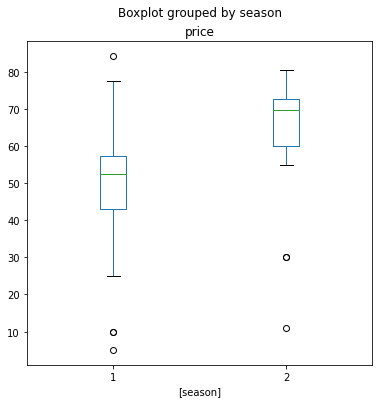

In [12]:
# Price distribution by season
bp = cowdata.boxplot(column=["price"], by=["season"], figsize=(6, 6), grid=False)

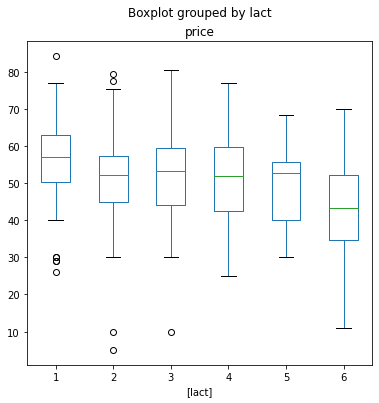

In [13]:
# Price distribution by lactation number
bp = cowdata.boxplot(column=["price"], by=["lact"], figsize=(6, 6), grid=False)

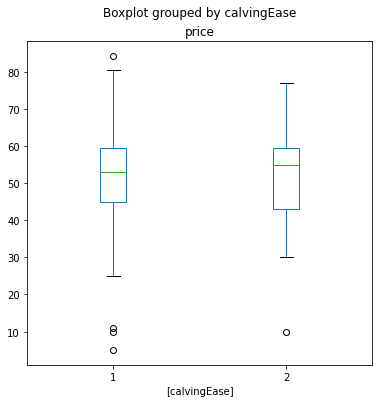

In [14]:
# Price distribution by Calving Ease
bp = cowdata.boxplot(column=["price"], by=["calvingEase"], figsize=(6, 6), grid=False)

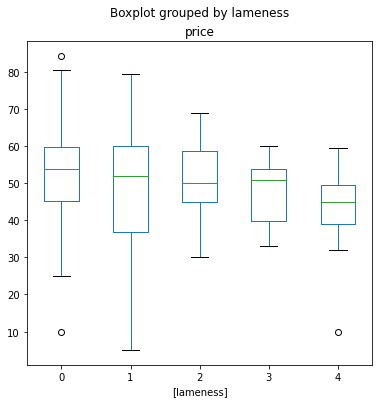

In [15]:
# Price distribution by number of lameness cases
bp = cowdata.boxplot(column=["price"], by=["lameness"], figsize=(6, 6), grid=False)

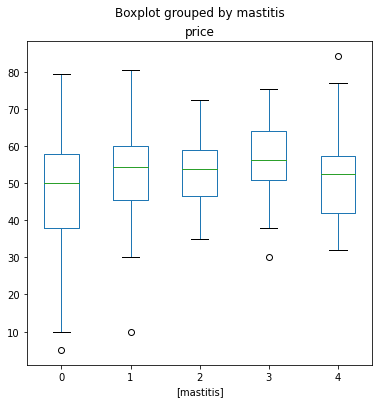

In [16]:
# Price distribution by number of mastitis cases
bp = cowdata.boxplot(column=["price"], by=["mastitis"], figsize=(6, 6), grid=False)

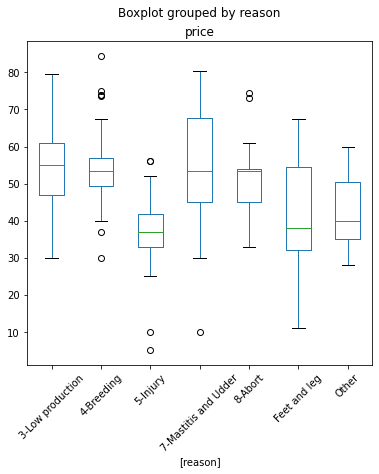

In [17]:
# Price distribution by culling reason
bp = cowdata.boxplot(column=["price"], by=["reason"], figsize=(6, 6), grid=False, rot=45)

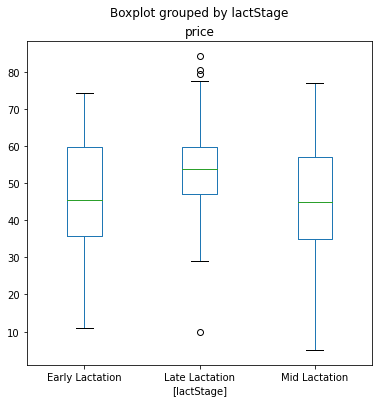

In [18]:
# Price distribution by lactation stage
bp = cowdata.boxplot(column=["price"], by=["lactStage"], figsize=(6, 6), grid=False)

### PART II. CORRELATION
Creating a subset of the data set with only numerical variables to calculate Pearson Correlation

In [20]:
cowdata[["305ME", "price", "BW"]].corr()

,305ME,price,BW
305ME,1.000000,0.114321,0.277510
price,0.114321,1.000000,0.395458
BW,0.277510,0.395458,1.000000


### PART III. REGRESSION

### Linear Regression
Using `statsmodel` package to fit a linear model. Adding `C()` around each variable name to converts it into a categorical variable during analysis

In [21]:
from statsmodels.formula.api import ols
cowdata = cowdata.rename(columns={"305ME": "x305ME"}) # Rename column so it doesn't start with a digit
lm = ols('price ~ C(season) + C(lact) + C(calvingEase) + C(lameness) + C(mastitis) + C(reason) + C(lactStage) + x305ME + BW',
               data=cowdata).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     14.98
Date:                Sat, 24 Sep 2022   Prob (F-statistic):           2.31e-42
Time:                        05:15:16   Log-Likelihood:                -1433.5
No. Observations:                 400   AIC:                             2919.
Df Residuals:                     374   BIC:                             3023.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

#### ANOVA

In [22]:
import statsmodels.api as sm
table = sm.stats.anova_lm(lm, typ=1)
print(table)

                   df        sum_sq      mean_sq          F        PR(>F)
C(season)         1.0   6152.117405  6152.117405  75.787769  1.025543e-16
C(lact)           5.0   4283.662930   856.732586  10.554066  1.705088e-09
C(calvingEase)    1.0      2.380706     2.380706   0.029328  8.641168e-01
C(lameness)       4.0   2135.696319   533.924080   6.577396  4.003794e-05
C(mastitis)       4.0   2480.071052   620.017763   7.637982  6.344807e-06
C(reason)         6.0   9664.241531  1610.706922  19.842255  3.851182e-20
C(lactStage)      2.0    591.857264   295.928632   3.645537  2.703948e-02
x305ME            1.0    110.591447   110.591447   1.362373  2.438703e-01
BW                1.0   4989.517837  4989.517837  61.465736  4.744632e-14
Residual        374.0  30359.673508    81.175598        NaN           NaN


### Leave-one-out cross-validation

In [23]:
import numpy as np
n = len(cowdata) # number of rows in the dataset
formula = 'price ~ C(season) + C(lact) + C(calvingEase) + C(lameness) + C(mastitis) + C(reason) + C(lactStage) + x305ME + BW'
yhat = []
for i in range(n): # loop through each row, and train with all other rows
    train_data = cowdata.copy()
    validation_data = cowdata.iloc[i:i+1]
    train_data = train_data.drop(labels=i)
    lm = ols(formula, data=train_data).fit()
    yhat.append(lm.predict(validation_data).iloc[0])
yhat = np.array(yhat)
ygnd = cowdata[["price"]].values.squeeze()
mse = np.sum((ygnd - yhat)**2) / n
mae = np.sum(abs(ygnd - yhat)) / n
corr = np.corrcoef(yhat, ygnd)  
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"Pearson correlation coefficient: {corr[0][1]}")

MSE: 88.86995232597725
MAE: 7.229225022734254
Pearson correlation coefficient: 0.6473430726496251


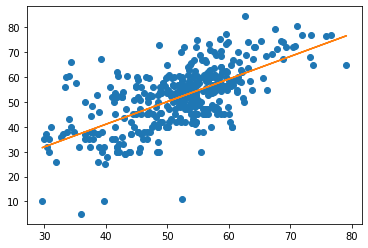

In [24]:
import matplotlib.pyplot as plt
plt.plot(yhat, ygnd, 'o')
m, b = np.polyfit(yhat, ygnd, 1)
plt.plot(yhat, m*yhat + b)